# Tree Based Models for Classification and Regressionabs


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')

## Classification-Tree

Sequence of if-else questions about individual features

**Objective**: infer class labels

Trees are able to capture non linear relationships between features and labels

Trees dont require feature scaling (standardiwation, normalization...)

A **decision region** is a region in the feature space where all instances are assigned to one class label. These decision regions are separated by **decision boundaries**

A decision tree provides rectangular decision regions in the feature space.

In [4]:
df = pd.read_csv('../data/churn.csv')
df

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
...,...,...,...
395,1,1.077655,0.878567
396,1,-1.273770,-0.869016
397,1,-0.426195,0.684666
398,1,0.818836,1.428091


In [18]:
X = df[['time_since_first_purchase', 'time_since_last_purchase']]
y = df['has_churned'].values.reshape(-1, 1)

In [24]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

dt = DecisionTreeClassifier(max_depth=2, random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.625

## Classification Tree Learning

A **decision tree** is a data structure consisting of a hierarchy of **nodes**. A **node** is a question or a prediction. 

There are three kinds of nodes: 
- **Root**: it has no parent node, and contains a question giving rise to two children nodes.
- **Internal node**: has one parent node, and contains a question giving rise to two children nodes.
- **Leaf**: has one parent node and no children -> prediction

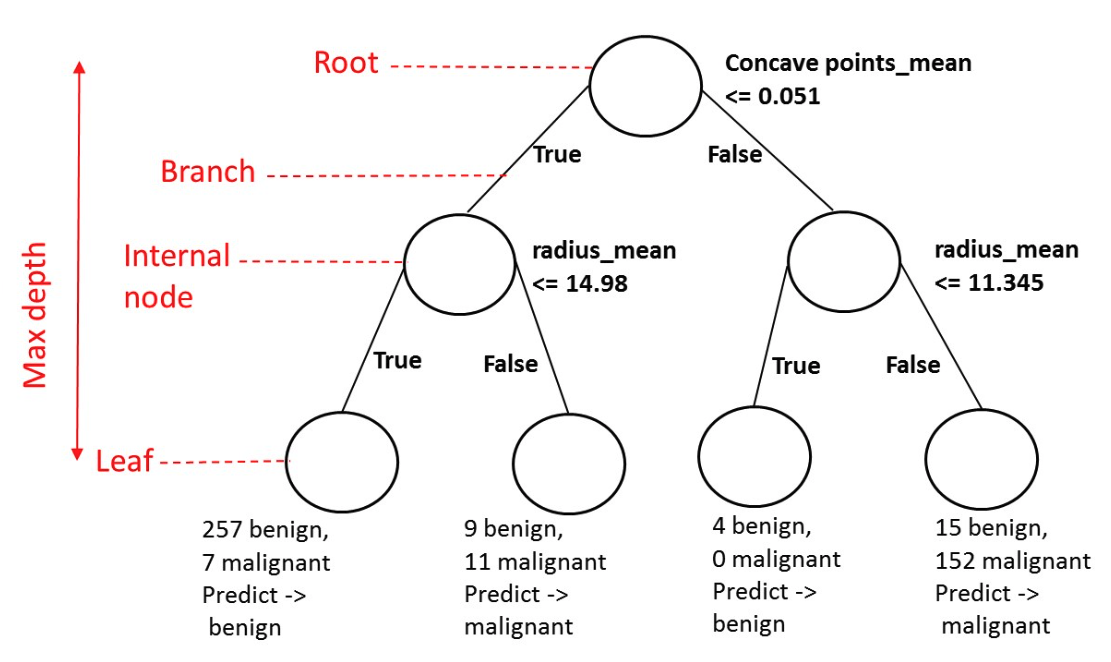


### **Splitting Criteria**
To decide the best way to split the data at each node, Decision Trees use criteria like **Gini impurity** or **Entropy**. These criteria measure how well a feature separates the data into distinct classes.

#### Gini Impurity
- **Gini Impurity** measures the probability of incorrectly classifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the subset.
- Formula:
$$
  \text{Gini}(S) = 1 - \sum_{i=1}^{C} p_i^2
$$
  where \(p_i\) is the proportion of elements belonging to class \(i\) in the dataset \(S\), and \(C\) is the total number of classes.

- **Interpretation**: Gini impurity ranges from 0 (pure) to 0.5 (maximum impurity in a binary classification). The lower the Gini, the better the split.

#### Entropy
- **Entropy** is a measure of the disorder or uncertainty in the dataset.
- Formula:
$$
  \text{Entropy}(S) = - \sum_{i=1}^{C} p_i \log_2(p_i)
$$
  where \(p_i\) is the proportion of elements in class \(i\).

- **Interpretation**: Entropy is 0 when the dataset is perfectly pure (all elements belong to a single class) and increases as the classes become more mixed.

### **Information Gain**
- **Information Gain** measures the reduction in entropy or Gini impurity after a dataset is split on an attribute. It is used to select the feature that results in the best split.
- Formula:
$$
  \text{Information Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \times \text{Entropy}(S_v)
$$
  where:
  - \(S\) is the original dataset.
  - \(A\) is the attribute on which we split.
  - \(S_v\) is the subset of \(S\) where the attribute \(A\) has value \(v\).

- **Interpretation**: The attribute with the highest information gain is chosen for the split.

## Learning Process of Decision Trees

The learning process of a decision tree can be broken down into the following steps:

### 1. **Selecting the Best Feature**
- At each node, evaluate all possible features using the splitting criteria (Gini or Entropy).
- Calculate the Information Gain for each feature.
- Choose the feature with the highest Information Gain.

### 2. **Splitting the Dataset**
- Split the dataset into subsets based on the selected feature.
- Each subset corresponds to a branch of the tree.

### 3. **Recursion**
- Recursively apply the above steps to each subset.
- Continue the process until one of the following stopping conditions is met:
  - All instances in a subset belong to the same class (pure node).
  - Maximum tree depth is reached.
  - Minimum number of samples in a node is reached.

### 4. **Pruning (Optional)**
- Pruning involves cutting down parts of the tree that add little predictive power, reducing overfitting and improving generalization.
- **Pre-pruning**: Stopping the tree-building process early based on certain conditions (e.g., max depth, min samples per leaf).
- **Post-pruning**: Removing branches after the tree has been built based on performance on a validation set.

In [26]:
#dt = DecisionTreeClassifier(criterion='gini', random_state=1)
dt = DecisionTreeClassifier(criterion='entropy', random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

accuracy_score(y_test, y_pred)

0.6

## Decision Trees for Regression


In [30]:
cars = pd.read_csv('../data/Auto.csv')
cars.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'origin', 'name'],
      dtype='object')

<Axes: xlabel='displacement', ylabel='mpg'>

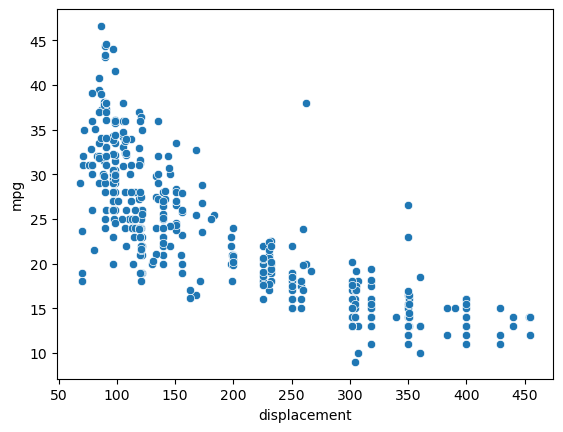

In [36]:
sns.scatterplot(data=cars, x='displacement', y='mpg')

In [32]:
X = cars[['displacement']]
y = cars['mpg'].values.reshape(-1, 1)

In [48]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

dt = DecisionTreeRegressor(max_depth=4, min_samples_leaf=0.1, random_state=3)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

mse_dt = MSE(y_test, y_pred)

rmse_dt = mse_dt**(1/2)

print(rmse_dt)

4.037188798144442
